In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sachin-tendulkar-all-international-centuries/Sachin-Tendulkar-All-International-Cricket-Centuries.csv


India's Sachin Tendulkar has become the first player to score 100 international centuries by compiling a ton in a one-day defeat against Bangladesh in Dhaka. The 38-year-old completed his landmark century, his 49th in one-day cricket, with a single clipped to square leg.****

Sachin Tendulkar is a retired Indian cricketer who is widely regarded as one of the greatest batsmen of all time, having scored the most runs in international cricket. Tendulkar has scored the most century (100 or more runs) in International Cricket Council (ICC) Test and One Day International (ODI) matches. His 51 hundreds in Test matches and 49 in ODIs set global records for the most centuries by a batsman. When he scored 114 against Bangladesh in March 2012, he became the first and only cricketer to do so.****

# import the libraray 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/sachin-tendulkar-all-international-centuries/Sachin-Tendulkar-All-International-Cricket-Centuries.csv')

In [26]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,date_year
0,1,119,England,6,4,"Old Trafford, Manchester",Away,1990-08-09,Drawn,1990
1,2,148,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,1992-01-02,Drawn,1992
2,3,114,Australia,4,2,"WACA Ground, Perth",Away,1992-02-01,Lost,1992
3,4,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,1992-11-26,Drawn,1992
4,5,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,1993-02-11,Won,1993


In [4]:
df.shape

(100, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       100 non-null    int64 
 1   Score     100 non-null    object
 2   Against   100 non-null    object
 3   Position  100 non-null    int64 
 4   Innings   100 non-null    int64 
 5   Venue     100 non-null    object
 6   Ground    100 non-null    object
 7   Date      100 non-null    object
 8   Result    100 non-null    object
dtypes: int64(3), object(6)
memory usage: 7.2+ KB


In [6]:
df.describe()

,No.,Position,Innings
count,100.000000,100.000000,100.000000
mean,50.500000,3.140000,1.630000
std,29.011492,1.206213,0.786952
min,1.000000,1.000000,1.000000
25%,25.750000,2.000000,1.000000
50%,50.500000,4.000000,1.000000
75%,75.250000,4.000000,2.000000
max,100.000000,6.000000,4.000000


In [7]:
df.isnull().sum()

No.         0
Score       0
Against     0
Position    0
Innings     0
Venue       0
Ground      0
Date        0
Result      0
dtype: int64

# data preprocessing

In [13]:

df['Score'] = df['Score'].str.replace('*', '')

df['Score'] = pd.to_numeric(df['Score'])

In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df['date_year'] = df['Date'].dt.year

/tmp/ipykernel_34/1143587046.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [15]:
df.head()

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result,date_year
0,1,119,England,6,4,"Old Trafford, Manchester",Away,1990-08-09,Drawn,1990
1,2,148,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,1992-01-02,Drawn,1992
2,3,114,Australia,4,2,"WACA Ground, Perth",Away,1992-02-01,Lost,1992
3,4,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,1992-11-26,Drawn,1992
4,5,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,1993-02-11,Won,1993


# exploratry data analysis 

In [9]:
df['Against'].value_counts()


Against
Australia       20
Sri Lanka       17
South Africa    12
England          9
New Zealand      9
Zimbabwe         8
West Indies      7
Pakistan         7
Bangladesh       6
Kenya            4
Namibia          1
Name: count, dtype: int64

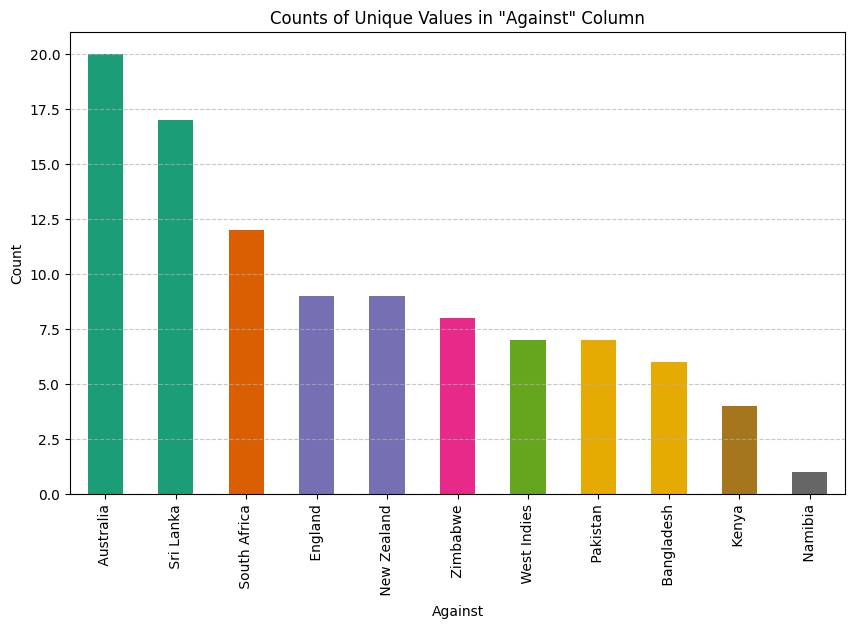

In [25]:
plt.figure(figsize=(10, 6))
counts = df['Against'].value_counts()
colors = plt.cm.Dark2(np.linspace(0, 1, len(filtered_counts)))
counts.plot(kind='bar',color = colors)
plt.xlabel('Against')
plt.ylabel('Count')
plt.title('Counts of Unique Values in "Against" Column')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# RESULT -- "Sachin made the highest number of centuries against Australia."

In [17]:
counts = df['date_year'].value_counts()
filtered_counts = counts[counts > 3]
print(filtered_counts)

date_year
1998    12
1999     8
2010     8
1996     8
2001     7
2002     6
1997     6
2008     5
2000     5
1994     5
2009     5
2004     4
Name: count, dtype: int64


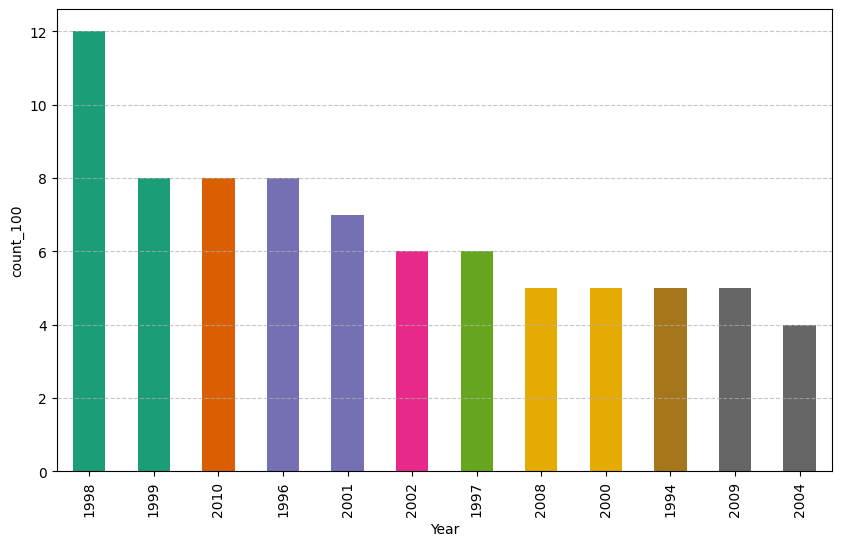

In [22]:
plt.figure(figsize=(10, 6))
colors = plt.cm.Dark2(np.linspace(0, 1, len(filtered_counts)))
filtered_counts.plot(kind='bar',color = colors)
plt.xlabel('Year')
plt.ylabel('count_100')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# # "Sachin made the highest number of centuries in the year 1998."

In [30]:
counts = df['Result'].value_counts()
filtered_won = counts[counts > 2]
print(filtered_won)

Result
Won      53
Lost     25
Drawn    20
Name: count, dtype: int64


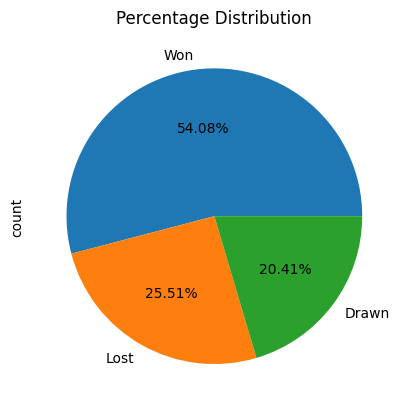

In [33]:
filtered_won.plot(kind='pie', autopct='%.2f%%')
plt.title('Percentage Distribution')
plt.show()

# "In matches where Sachin made a century, India won 54.08% of the time."

In [44]:
cross_tab = pd.crosstab(df['Ground'], df['Against'])

print(cross_tab)

Against  Australia  Bangladesh  England  Kenya  Namibia  New Zealand  \
Ground                                                                 
Away             7           6        5      0        0            3   
Home             9           0        4      2        0            6   
Neutral          4           0        0      2        1            0   

Against  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwe  
Ground                                                             
Away            3             6          9            1         1  
Home            2             6          5            4         4  
Neutral         2             0          3            2         3  


In [35]:
groud_match = df['Ground'].value_counts()
print(groud_match)

Ground
Home       42
Away       41
Neutral    17
Name: count, dtype: int64


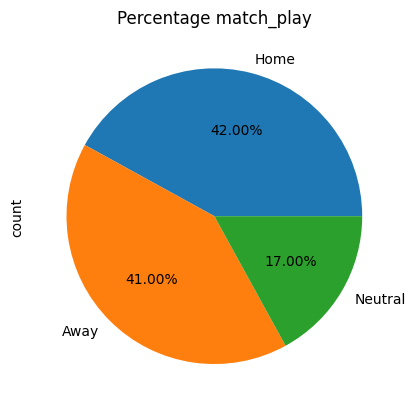

In [36]:
groud_match.plot(kind='pie', autopct='%.2f%%')
plt.title('Percentage match_play')
plt.show()


# "Sachin scored 42 % PERCENT centuries on home ground."

In [37]:
best_position = df['Position'].value_counts()
print(best_position)

Position
4    48
2    40
1     5
5     5
6     2
Name: count, dtype: int64


# "The best batting position for Sachin Tendulkar is number 4."

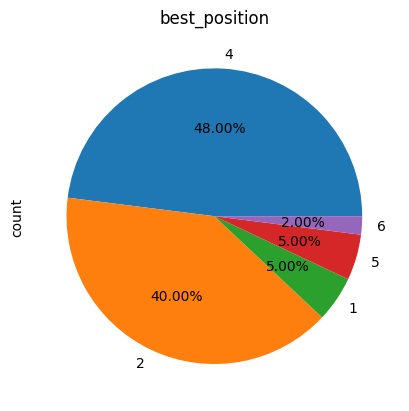

In [38]:
best_position.plot(kind='pie', autopct='%.2f%%')
plt.title('best_position')
plt.show()

In [40]:
count_greater_than_200 = df[df['Score'] > 200].shape[0]
print("Count of entries with score greater than 200:", count_greater_than_200)

Count of entries with score greater than 200: 6


In [42]:
count_greater_than_200 = df[df['Score'] > 200].shape[0]

count_greater_than_200

6


# "Sachin Tendulkar has scored more than 200 runs in a single innings six times."